# Preliminary Exploration of Lake Coeur d'Alene Discharge Projections

## By: Lejo Flores
## Date: 9 May 2021

From: https://www.hydro.washington.edu/CRCC/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_dir = '/Users/lejoflores/data/FWQ-LakeCdA/'

watershed = 'COE'
climmodel = 'CanESM2_'
scenario  = 'RCP45_'
dsmethod  = 'MACA_'
hydmodel  = 'VIC_P1'
dataset   = 'biascorrected_streamflow'
version   = '1.0'
ext       = '.csv'


In [2]:
qfile = data_dir + \
            watershed + '/' + \
            dataset + '/' + \
            climmodel + \
            scenario + \
            dsmethod + \
            hydmodel + \
            '-' + watershed + '-' + \
            dataset + '-' + \
            version + \
            ext

print(qfile)

/Users/lejoflores/data/FWQ-LakeCdA/COE/biascorrected_streamflow/CanESM2_RCP45_MACA_VIC_P1-COE-biascorrected_streamflow-1.0.csv


In [3]:
df = pd.read_csv(qfile, comment='#', parse_dates=['date'])
df

,date,biascorrected_streamflow
0,1950-01-01,1944.917
1,1950-01-02,3129.238
2,1950-01-03,7352.598
3,1950-01-04,4902.938
4,1950-01-05,3752.424
...,...,...
54782,2099-12-27,7871.848
54783,2099-12-28,7635.556
54784,2099-12-29,6942.010
54785,2099-12-30,6940.330


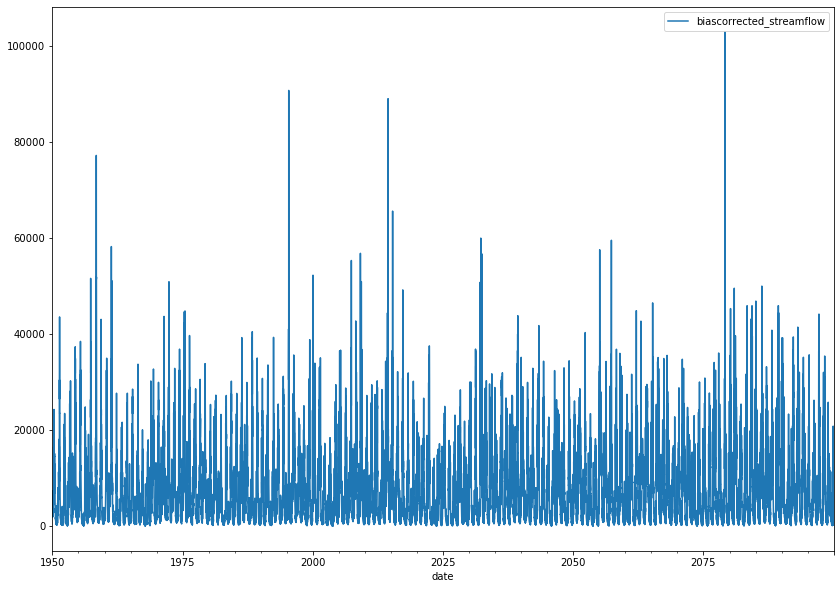

In [4]:
df.plot('date',dataset, figsize=(14,10))

## Group the Projections by Decades and Compute Average Annual Streamflow

In [5]:
df_decade = df.groupby(df.date.dt.year.sub(1950)//10).mean()
df_decade

,biascorrected_streamflow
date,
0,6648.583512
1,5325.596473
2,7505.943914
3,6026.159702
4,6226.182583
5,6488.874557
6,6763.304513
7,4893.373340
8,7730.762561


In [6]:
decades = np.linspace(1955, 2095, num=15)
print(decades)

[1955. 1965. 1975. 1985. 1995. 2005. 2015. 2025. 2035. 2045. 2055. 2065.
 2075. 2085. 2095.]


Text(0, 0.5, 'Annual Average Discharge [ft${}^3$/s]')

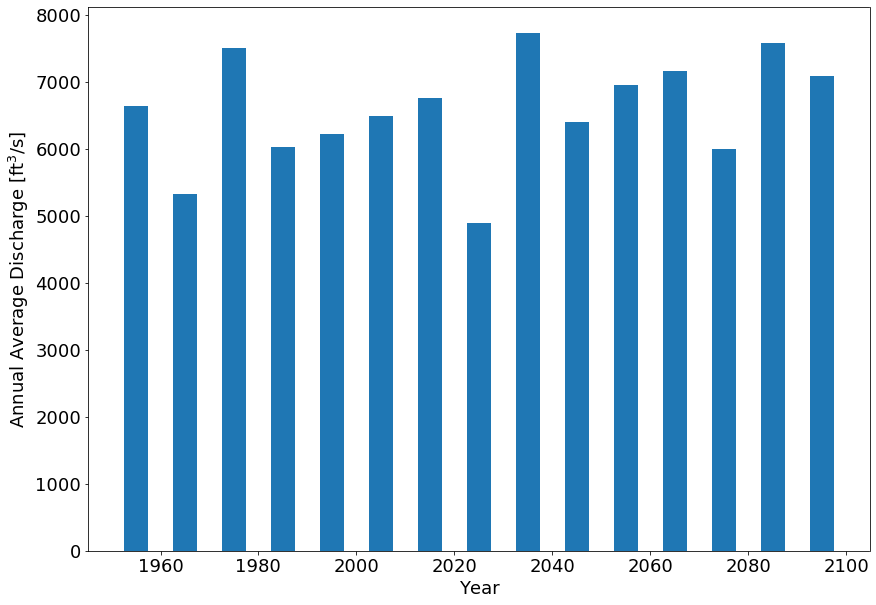

In [7]:
plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18})
plt.bar(decades,df_decade.biascorrected_streamflow.values, width=5)
plt.xlabel('Year')
plt.ylabel('Annual Average Discharge [ft${}^3$/s]')

In [8]:
df_decade['streamflow_var'] = df.groupby(df.date.dt.year.sub(1950)//10).std()

Text(0, 0.5, 'Annual Standard Deviation in Discharge [ft${}^3$/s]')

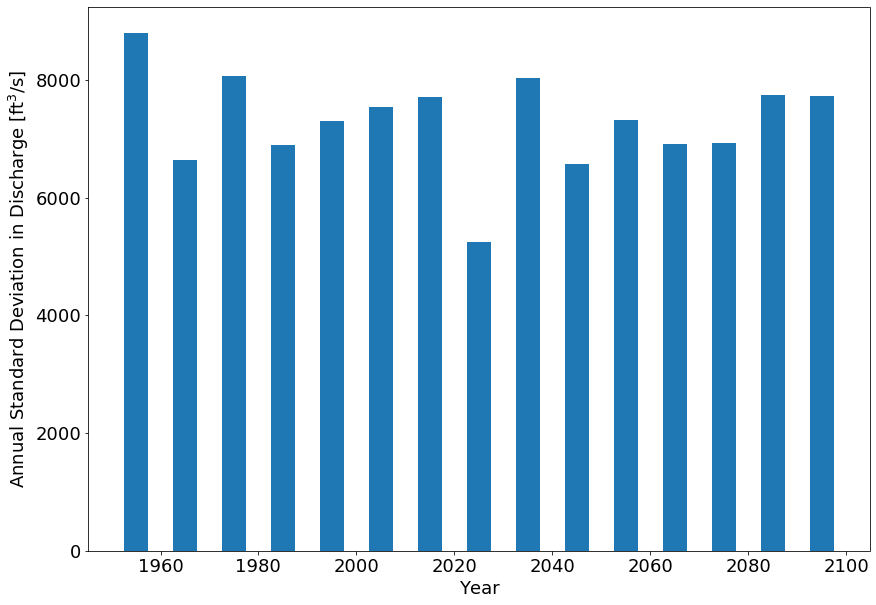

In [9]:
plt.figure(figsize=(14,10))
plt.rcParams.update({'font.size': 18})
plt.bar(decades,df_decade.streamflow_var.values, width=5)
plt.xlabel('Year')
plt.ylabel('Annual Standard Deviation in Discharge [ft${}^3$/s]')

In [11]:
df.shape[0]

54787